In [9]:
import json
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns
import pandas as pd

font_dirs = ['//Users/oscarb/Downloads/aptos-font', ]  # The directory containing your font file
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

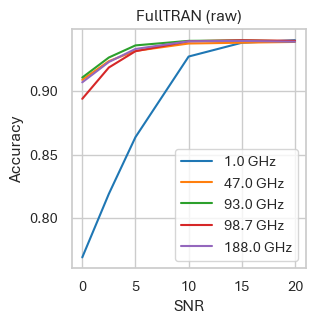

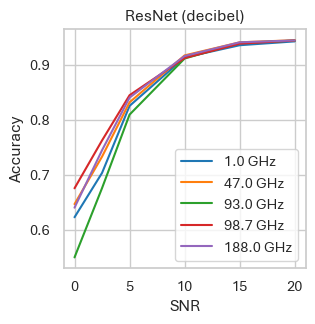

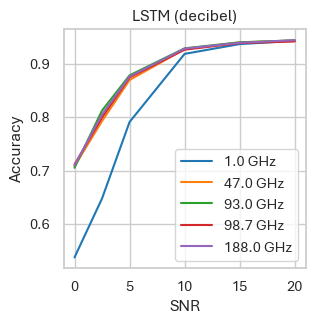

In [19]:


def plot_sinus_resnet(json_filename, title):
    # Load the JSON data
    with open(json_filename) as f:
        data = json.load(f)

    # Convert JSON data to DataFrame
    df = pd.DataFrame(data['data'], columns=data['columns'])

    # Convert frequency to gigahertz for easier interpretation
    df['frequency_GHz'] = df['frequency'] / 1e9

    # Set the style
    sns.set_theme(style="whitegrid")
    sns.set_palette("tab10")
    #plt.rcParams['font.family'] = 'Palatino'
    plt.rcParams['font.family'] = 'Aptos'
    plt.rcParams['font.size'] = 32

    # Plotting
    fig, ax = plt.subplots(figsize=(4, 4))
    # Use a loop to plot each frequency as a separate line, labeled in GHz
    for frequency_GHz in sorted(df['frequency_GHz'].unique()):
        subset = df[df['frequency_GHz'] == frequency_GHz]
        sns.lineplot(x='intensity', y='accuracy', data=subset, ax=ax, label=f'{frequency_GHz} GHz')

    # Set labels for x and y axes
    ax.set_xlabel("SNR")
    ax.set_ylabel("Accuracy")

    ax.legend()
    plt.title(title)
    plt.tight_layout()
    # Display the plots
    plt.savefig(f"/Users/oscarb/Downloads/{title}2.pdf", format='pdf', bbox_inches='tight')
    plt.show()

# Example usage:
# plot_sinus_resnet('sinus_resnet.json')

plot_sinus_resnet("sinus_full_trans_raw.json", "FullTRAN (raw)")
#plot_sinus_resnet("sinus_bilstm_raw.json", "Bi-LSTM (raw)")

plot_sinus_resnet("sinus_resnet.json", "ResNet (decibel)")
#plot_sinus_resnet("sinus_sparse_tran_db.json", "SparseTRAN (decibel)")
plot_sinus_resnet("sinus_lstm_db.json", "LSTM (decibel)")
